<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2024 </h4>
    <hr>
    <h1> Lab 10: Recurrent Neural Networks </h1>
    <h3></h3>
</center>

## <center> Case: MNIST on RNN

## Coding section
### Abstract:

<font face="Times New Roman">Consider the classification problem of the MNIST dataset.</font>

<font face="Times New Roman">1. Data processing: We load the MNIST dataset.</font>

<font face="Times New Roman">2. Model training and prediction: We develop a RNN based on PyTorch architecture and train it. Calculate the accuracy to evaluate the performance of these models.</font>
    
<font face="Times New Roman">3. Visualizing results: (1) Confusion Matrix. (2) The accuracy. </font>

### Problem Description:
    
<font face="Times New Roman">Implement an ANN with input layer, hidden layer, and output layer based on PyTorch architecture to classify MNIST datasets.


### 1. Data processing

In [1]:
# Load packages
from torchvision.datasets import MNIST # pip install torchvision
from torchvision.transforms import Compose,ToTensor,Normalize
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import os
import torch
import numpy as np
import matplotlib.pyplot as plt  

torch.manual_seed(42)
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

print(torch.cuda.is_available())

False


In [2]:
# Set the batch size and the test size
BATCH_SIZE = 100
TEST_BATCH_SIZE = 100

#Prepare the dataset
def get_dataloader(Train=True, batch=BATCH_SIZE):
    
    transform_fn = Compose([
        ToTensor(),
        Normalize(mean = (0.1307,),std = (0.3081,))
        ])
    
    dataset = MNIST(root = './data', train = Train, transform = transform_fn)  # download=True
    data_loader = DataLoader(dataset, batch_size = batch, shuffle = True)
    
    return data_loader

train_loader = get_dataloader(Train = True, batch = BATCH_SIZE)  #Get Train Data Loader
test_loader = get_dataloader(Train = False, batch = TEST_BATCH_SIZE)  #Get Test Data Loader

In [3]:
# View the data size
train_data = MNIST(root = './data',train = True, transform = ToTensor())
test_data = MNIST(root = './data',train = False, transform = ToTensor())

print(train_data)
print(test_data)
print(train_data.data.size())
print(train_data.targets.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])
torch.Size([60000])


### 2. Model training and prediction

In [4]:
class RNN(nn.Module):
    def __init__(self,input_dim = 28, hidden_dim = 128, n_layers = 2, n_classes = 10):
        super(RNN,self).__init__()
        
        # Fill in the blanks
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_size=input_dim, hidden_size=hidden_dim, num_layers=n_layers, batch_first=True)
        self.classifier = nn.Linear(hidden_dim, n_classes)
        
    def forward(self,x):
        
        # Fill in the blanks
        out,(h_n, c_n) = self.rnn(x)
        x = h_n
        x = self.classifier(x)
        return x
        

In [6]:
class LSTM(nn.Module):
    def __init__(self,input_dim = 28, hidden_dim = 128, n_layers = 2, n_classes = 10):
        super(LSTM,self).__init__()
        
        # Fill in the blanks
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=n_layers, batch_first=True)
        self.classifier = nn.Linear(hidden_dim, n_classes)
        
    def forward(self,x):
        
        # Fill in the blanks
        out,(h_n, c_n) = self.lstm(x)
        x = h_n[-1,:,:]
        x = self.classifier(x)
        return x
        

In [7]:
Model_RNN = RNN().to(device)
Model_LSTM = LSTM().to(device)

print(Model_RNN)

print('# Model parameters:', sum(param.numel() for param in Model_RNN.parameters()))

print(Model_LSTM)

print('# Model parameters:', sum(param.numel() for param in Model_LSTM.parameters()))

RNN(
  (rnn): RNN(28, 128, num_layers=2, batch_first=True)
  (classifier): Linear(in_features=128, out_features=10, bias=True)
)
# Model parameters: 54538
LSTM(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True)
  (classifier): Linear(in_features=128, out_features=10, bias=True)
)
# Model parameters: 214282


In [8]:
# RNN training and testing
print("Training RNN")

# Fill in the blanks
Model = Model_RNN
Criterion = nn.CrossEntropyLoss()
Optimizer = Adam(Model.parameters(), lr=0.0001)

EPOCH = 10
train_loss = []
train_acc = []
test_loss = []
test_acc  = []

for epoch in range(EPOCH):
    
    train_loss_sum, test_loss_sum, train_num, test_num, train_i, test_i = 0.0, 0.0, 0, 0, 0, 0
    train_acc_sum,test_acc_sum = 0, 0
    TEST_acc_sum = 0
    
    for i_1, train_data in enumerate(train_loader):
        
        inputs, labels = train_data
        
        inputs = torch.squeeze(inputs,1)
        
        inputs = inputs.type(torch.FloatTensor)
        inputs = inputs.to(device)
        
        labels = labels.long()
        labels = labels.to(device)
        
        # Fill in the blanks
        Model.train()
        pre_labs = Model(inputs)
        Loss = Criterion(pre_labs, labels)
        Optimizer.zero_grad()
        Loss.backward()
        Optimizer.step()
        
        train_loss_sum += Loss.item()
        train_acc_sum += (pre_labs.argmax(dim=1) == labels).sum().item()
        train_num += labels.shape[0]
        train_i += 1

    pred_list = []
    target_list = []
    for i_2, data in enumerate(test_loader):
        with torch.no_grad():

            test_data, test_lab = data
            test_data = torch.squeeze(test_data,1)
            test_data = test_data.type(torch.FloatTensor)
            test_data = test_data.to(device)
            
            test_lab = test_lab.long()
            test_lab = test_lab.to(device)
            
            target_list.append(test_lab.view(-1).tolist())

            # Fill in the blanks
            Model.eval()
            pre_test = Model(test_data)
            pred_lab = pre_test.argmax(dim=1)
            pred_list.append(pred_lab.view(-1).tolist())
            
            t_loss = Criterion(pre_test, test_lab)

            test_loss_sum += t_loss    
            test_acc_sum += (pred_lab == test_lab).sum().item()
            test_num += test_lab.shape[0]                    
            test_i += 1
       
    Train_Loss = train_loss_sum/train_i
    Test_Loss = test_loss_sum/test_i
    Train_ACC = train_acc_sum/train_num
    Test_ACC = test_acc_sum/test_num

    print('Epoch:%d, train_loss:%.5f, train_acc:%.5f, test_loss:%.5f, test_acc:%.5f' % 
          (epoch, Train_Loss, Train_ACC, Test_Loss, Test_ACC))
    print('-----------------------------------------------')

    train_loss.append(Train_Loss)            
    train_acc.append(Train_ACC) 
    test_loss.append(Test_Loss) 
    test_acc.append(Test_ACC)       

print("Finished Training")

Training RNN
Epoch:0, train_loss:1.48939, train_acc:0.49780, test_loss:0.98903, test_acc:0.66920
-----------------------------------------------
Epoch:1, train_loss:0.82420, train_acc:0.73247, test_loss:0.69846, test_acc:0.77580
-----------------------------------------------
Epoch:2, train_loss:0.63496, train_acc:0.79163, test_loss:0.56795, test_acc:0.81190
-----------------------------------------------
Epoch:3, train_loss:0.53338, train_acc:0.82268, test_loss:0.49131, test_acc:0.83490
-----------------------------------------------
Epoch:4, train_loss:0.45768, train_acc:0.85167, test_loss:0.42410, test_acc:0.87080
-----------------------------------------------
Epoch:5, train_loss:0.38646, train_acc:0.88733, test_loss:0.34590, test_acc:0.89840
-----------------------------------------------
Epoch:6, train_loss:0.32720, train_acc:0.90638, test_loss:0.30593, test_acc:0.91520
-----------------------------------------------
Epoch:7, train_loss:0.28899, train_acc:0.91865, test_loss:0.274

In [9]:
y_test_RNN = np.array(target_list).flatten()
y_pred_RNN = np.array(pred_list).flatten()
print('train_acc:')
print(train_acc)
print('----------------------------------------')

print('test_acc:')
print(test_acc)
print('----------------------------------------')

train_acc_RNN = train_acc
test_acc_RNN = test_acc

train_acc:
[0.4978, 0.7324666666666667, 0.7916333333333333, 0.8226833333333333, 0.8516666666666667, 0.8873333333333333, 0.9063833333333333, 0.91865, 0.9253, 0.9316666666666666]
----------------------------------------
test_acc:
[0.6692, 0.7758, 0.8119, 0.8349, 0.8708, 0.8984, 0.9152, 0.9229, 0.9289, 0.9303]
----------------------------------------


In [10]:
# LSTM training and testing

print("Training LSTM")

# Fill in the blanks
Model = Model_LSTM
Criterion = nn.CrossEntropyLoss()
Optimizer = Adam(Model.parameters(), lr=0.0001)

EPOCH = 10
train_loss = []
train_acc = []
test_loss = []
test_acc  = []

for epoch in range(EPOCH):
    
    train_loss_sum, test_loss_sum, train_num, test_num, train_i, test_i = 0.0, 0.0, 0, 0, 0, 0
    train_acc_sum,test_acc_sum = 0, 0
    TEST_acc_sum = 0
    
    for i_1, train_data in enumerate(train_loader):
        
        inputs, labels = train_data
        
        inputs = torch.squeeze(inputs,1)
        
        inputs = inputs.type(torch.FloatTensor)
        inputs = inputs.to(device)
        
        labels = labels.long()
        labels = labels.to(device)
        
        # Fill in the blanks
        Model.train()
        pre_labs = Model(inputs)
        Loss = Criterion(pre_labs, labels)
        Optimizer.zero_grad()
        Loss.backward()
        Optimizer.step()
        
        train_loss_sum += Loss.item()
        train_acc_sum += (pre_labs.argmax(dim=1) == labels).sum().item()
        train_num += labels.shape[0]
        train_i += 1

    pred_list = []
    target_list = []
    for i_2, data in enumerate(test_loader):
        with torch.no_grad():

            test_data, test_lab = data
            test_data = torch.squeeze(test_data,1)
            test_data = test_data.type(torch.FloatTensor)
            test_data = test_data.to(device)
            
            test_lab = test_lab.long()
            test_lab = test_lab.to(device)
            
            target_list.append(test_lab.view(-1).tolist())

            
            # Fill in the blanks
            Model.eval()
            pre_test = Model(test_data)
            pred_lab = pre_test.argmax(dim=1)
            
            pred_list.append(pred_lab.view(-1).tolist())
            
            t_loss = Criterion(pre_test, test_lab)

            test_loss_sum += t_loss    
            test_acc_sum += (pred_lab == test_lab).sum().item()
            test_num += test_lab.shape[0]                    
            test_i += 1
       
    Train_Loss = train_loss_sum/train_i
    Test_Loss = test_loss_sum/test_i
    Train_ACC = train_acc_sum/train_num
    Test_ACC = test_acc_sum/test_num

    print('Epoch:%d, train_loss:%.5f, train_acc:%.5f, test_loss:%.5f, test_acc:%.5f' % 
          (epoch, Train_Loss, Train_ACC, Test_Loss, Test_ACC))
    print('-----------------------------------------------')

    train_loss.append(Train_Loss)            
    train_acc.append(Train_ACC) 
    test_loss.append(Test_Loss) 
    test_acc.append(Test_ACC)       

print("Finished Training")

Training LSTM
Epoch:0, train_loss:1.09555, train_acc:0.64377, test_loss:0.38848, test_acc:0.89380
-----------------------------------------------
Epoch:1, train_loss:0.27035, train_acc:0.92612, test_loss:0.18323, test_acc:0.95000
-----------------------------------------------
Epoch:2, train_loss:0.16131, train_acc:0.95398, test_loss:0.13143, test_acc:0.96220
-----------------------------------------------
Epoch:3, train_loss:0.11943, train_acc:0.96655, test_loss:0.12385, test_acc:0.96320
-----------------------------------------------
Epoch:4, train_loss:0.09899, train_acc:0.97165, test_loss:0.09035, test_acc:0.97370
-----------------------------------------------
Epoch:5, train_loss:0.08395, train_acc:0.97530, test_loss:0.07902, test_acc:0.97700
-----------------------------------------------
Epoch:6, train_loss:0.07353, train_acc:0.97857, test_loss:0.08191, test_acc:0.97480
-----------------------------------------------
Epoch:7, train_loss:0.06559, train_acc:0.98070, test_loss:0.07

In [11]:
y_test_LSTM = np.array(target_list).flatten()
y_pred_LSTM = np.array(pred_list).flatten()
print('train_acc:')
print(train_acc)
print('----------------------------------------')

print('test_acc:')
print(test_acc)
print('----------------------------------------')

train_acc_LSTM = train_acc
test_acc_LSTM = test_acc

train_acc:
[0.6437666666666667, 0.9261166666666667, 0.9539833333333333, 0.96655, 0.97165, 0.9753, 0.9785666666666667, 0.9807, 0.9829, 0.9838166666666667]
----------------------------------------
test_acc:
[0.8938, 0.95, 0.9622, 0.9632, 0.9737, 0.977, 0.9748, 0.9779, 0.9798, 0.9774]
----------------------------------------


### 3. Visualizing results

### 3.1 Confusion Matrix

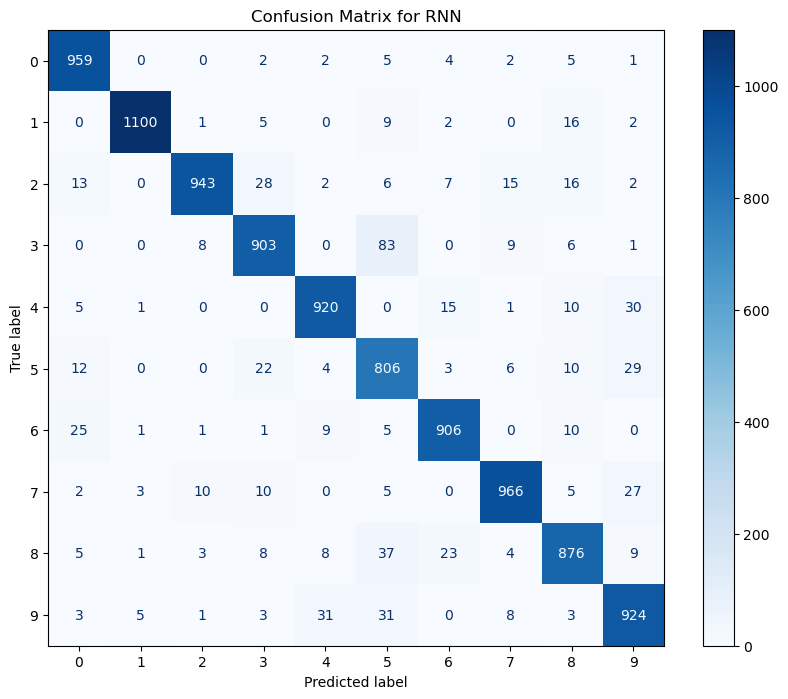

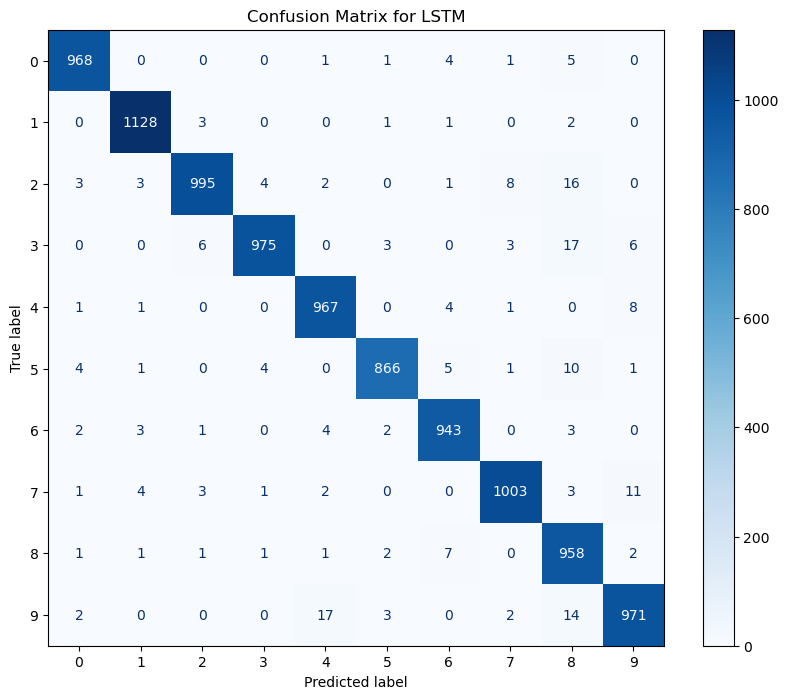

In [12]:
# Load Python packages for Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix for RNN
fig,ax = plt.subplots(figsize=(10,8))
cm = confusion_matrix(y_test_RNN, y_pred_RNN, labels=np.arange(0,10,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(0,10,1))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for RNN')
plt.show()

# Plot the confusion matrix for LSTM
fig,ax = plt.subplots(figsize=(10,8))
cm = confusion_matrix(y_test_LSTM, y_pred_LSTM, labels=np.arange(0,10,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(0,10,1))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for LSTM')
plt.show()


### 3.2 Plot the accuracy

Text(0.5, 0, 'Iteration')

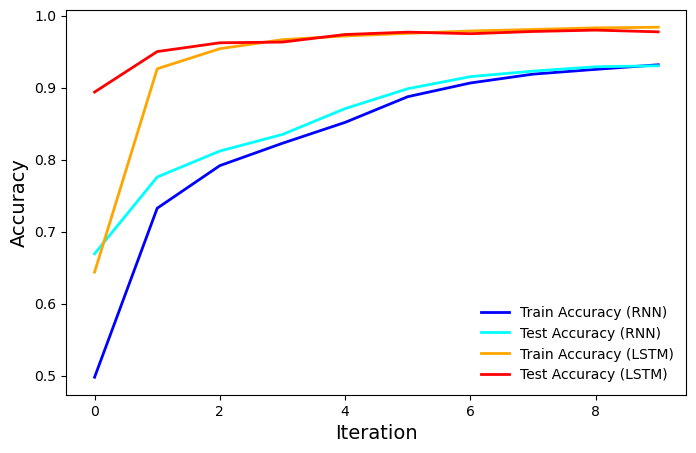

In [13]:
X_epoch = np.arange(EPOCH)

fig = plt.figure(figsize=[8,5])
sub = fig.add_subplot(111)
sub.plot(
    X_epoch,
    train_acc_RNN,
    label='Train Accuracy (RNN)',
    linewidth=2,
    color='blue'
)
sub.plot(
    X_epoch,
    test_acc_RNN,
    label='Test Accuracy (RNN)',
    linewidth=2,
    color='cyan'
)
sub.plot(
    X_epoch,
    train_acc_LSTM,
    label='Train Accuracy (LSTM)',
    linewidth=2,
    color='orange'
)
sub.plot(
    X_epoch,
    test_acc_LSTM,
    label='Test Accuracy (LSTM)',
    linewidth=2,
    color='red'
)

plt.legend(loc=4, edgecolor='w')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Iteration', fontsize=14)






